In [1]:
#我的方法~

In [2]:
import numpy as np

In [3]:
import tensorflow.keras as keras

In [4]:
import tensorflow as tf

In [5]:
(x1_test,y1_test), (x2_test,y2_test)= keras. datasets.mnist.load_data()#(x1_test=train_image，y1_test=train_label),(x2_test=test_image,y2_test=test_label)
x1_test.shape, y1_test.shape, x2_test.shape, y2_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
x= x1_test[18]
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()
    
#range(28)代表由28X28矩陣所組成

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34169250 40  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 58242221143 17  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 75247143 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 37245184  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  8192200 14  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0139247 28  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  7231183  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0125243 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0195184  0  0  0  0  0  0  0  0  

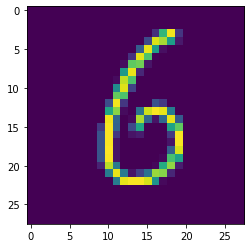

In [7]:
import matplotlib.pyplot as pl

pl.imshow(x)


In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(256,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [9]:
network.compile(
    optimizer = 'Nadam', # 指定優化器→控制梯度下降的確切規則
    loss = 'categorical_crossentropy', # 指定損失函數
    metrics = ['accuracy'] # 指定評量準則
)

In [10]:
x1_test = x1_test.reshape((60000,28*28))
x1_test = x1_test.astype('float32')/ 255

x2_test = x2_test.reshape((10000,28*28))
x2_test = x2_test.astype('float32')/ 255

In [11]:
#建模


In [12]:
from tensorflow.keras.utils import to_categorical

y1_test = to_categorical(y1_test)
y2_test = to_categorical(y2_test)

In [13]:
network.fit(x1_test,y1_test,epochs=16,batch_size=128,validation_split=0.2)

Epoch 1/16
375/375 [==============================] - 4s 8ms/step - loss: 0.2543 - accuracy: 0.9269 - val_loss: 0.1216 - val_accuracy: 0.9622
Epoch 2/16
375/375 [==============================] - 3s 8ms/step - loss: 0.0881 - accuracy: 0.9735 - val_loss: 0.0979 - val_accuracy: 0.9711
Epoch 3/16
375/375 [==============================] - 3s 8ms/step - loss: 0.0526 - accuracy: 0.9841 - val_loss: 0.0876 - val_accuracy: 0.9738
Epoch 4/16
375/375 [==============================] - 3s 8ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0862 - val_accuracy: 0.9752
Epoch 5/16
375/375 [==============================] - 3s 8ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.1024 - val_accuracy: 0.9734
Epoch 6/16
375/375 [==============================] - 3s 8ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0905 - val_accuracy: 0.9766
Epoch 7/16
375/375 [==============================] - 3s 8ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0900 - val_accuracy: 0.9775
Epoch 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


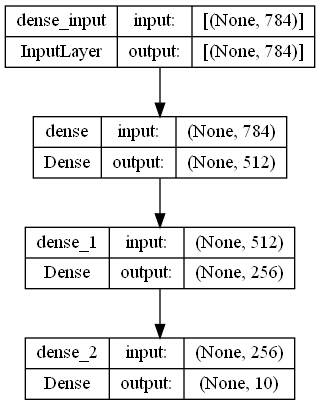

In [14]:
from tensorflow.keras.utils import plot_model
network.summary()

plot_model(network, 
    show_shapes= True,
)

In [16]:
test_loss , test_acc = network.evaluate(x2_test,y2_test)

print('test_acc:',test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9794
test_acc: 0.9793999791145325
